# Red neuronal convolucional

In [1]:
#Variable 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K

import tensorflow as tf
import sys
import numpy as np

from keras.utils import np_utils 
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow import keras

import pickle
import os
import cv2
import matplotlib.pyplot as plt

import pathlib
import seaborn as sns
import pandas as pd                     
from IPython import display


In [2]:
#Parametros
categories = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","nn","o","p","q","r","s","t","u","v","w","x","y","z"]
longitud, altura = 60,60
clases = 27

# Cargando datos

In [3]:
pickle_in = open("Xfusion","rb")
X = pickle.load(pickle_in)
pickle_in = open("Yfusion","rb")
y = pickle.load(pickle_in)

X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.33, shuffle = True)

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255 

Y_train = np_utils.to_categorical(Y_train, clases) 
Y_test = np_utils.to_categorical(Y_test, clases) 


# Creacion del modelo

In [4]:
cnn = Sequential()
cnn.add(Convolution2D(32,(3, 3), padding ="same", input_shape=(longitud, altura, 1), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Convolution2D(64, (2, 2), padding ="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(clases, activation='softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

cnn.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])



In [5]:

history = cnn.fit(X_train, Y_train,
      epochs=20,
      batch_size=32,
      shuffle=True,
      validation_data=(X_test, Y_test))

scores = cnn.evaluate(X_test, Y_test, verbose=1) 
print("Accuracy: ", scores[1])
 
 

Epoch 1/20
1016/1016 [==============================] - 32s 12ms/step - loss: 1.1261 - accuracy: 0.6207 - val_loss: 0.3186 - val_accuracy: 0.8870
Epoch 2/20
1016/1016 [==============================] - 12s 12ms/step - loss: 0.3270 - accuracy: 0.8828 - val_loss: 0.1795 - val_accuracy: 0.9413
Epoch 3/20
1016/1016 [==============================] - 12s 12ms/step - loss: 0.2064 - accuracy: 0.9259 - val_loss: 0.1623 - val_accuracy: 0.9385
Epoch 4/20
1016/1016 [==============================] - 12s 12ms/step - loss: 0.1523 - accuracy: 0.9473 - val_loss: 0.1132 - val_accuracy: 0.9621
Epoch 5/20
1016/1016 [==============================] - 12s 12ms/step - loss: 0.1386 - accuracy: 0.9522 - val_loss: 0.0985 - val_accuracy: 0.9666
Epoch 6/20
1016/1016 [==============================] - 12s 12ms/step - loss: 0.1079 - accuracy: 0.9623 - val_loss: 0.0861 - val_accuracy: 0.9718
Epoch 7/20
1016/1016 [==============================] - 12s 12ms/step - loss: 0.0996 - accuracy: 0.9648 - val_loss: 0.0963 -

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 256)               3

# Ejemplo de prediccion

In [7]:
ress = cnn.predict(X_test)

La seña es: c


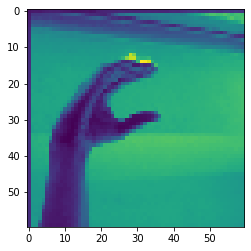

In [8]:
numero = 7
print("La seña es:", categories[np.argmax(ress[numero])])
plt.imshow(X_test[numero].reshape(60, 60))

# Matriz de confusion y graficos de entrenamiento

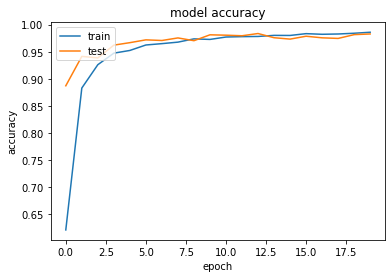

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

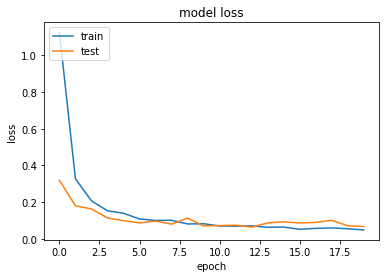

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
prediccionTest =  np.argmax(cnn.predict(X_test),  axis=1)

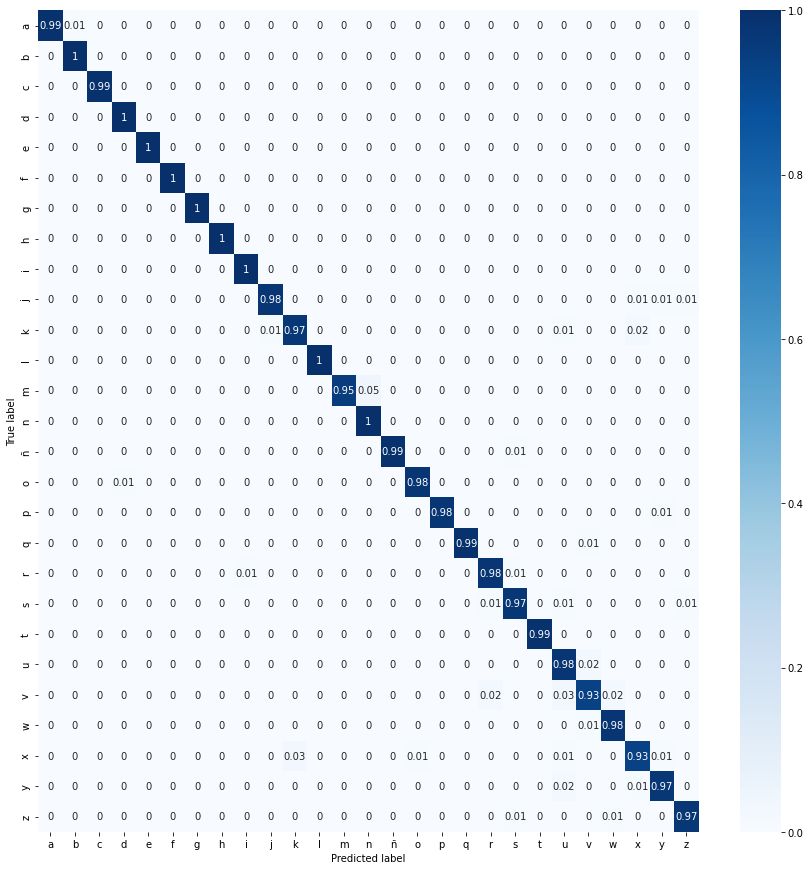

In [12]:
classes=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","ñ","o","p","q","r","s","t","u","v","w","x","y","z"]
con_mat = tf.math.confusion_matrix(labels=Y_test2, predictions=prediccionTest).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(12, 12))

sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()